In [1]:
#analysis of returns of major FMCG companies in India with data obtained from yahoo finance
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
cf.go_offline()
                   

In [2]:
import pandas as pd
from pandas_datareader import data

symbol = 'BRITANNIA.NS'
data_source='yahoo'
start_date = '2009-01-01'
end_date = '2019-12-31'

dfbritannia = data.DataReader(symbol, data_source, start_date, end_date)




In [3]:
symbol = 'HINDUNILVR.NS'
data_source='yahoo'
start_date = '2009-01-01'
end_date = '2019-12-31'

dfunilever = data.DataReader(symbol, data_source, start_date, end_date)

In [4]:
symbol = 'NESTLEIND.NS'
data_source='yahoo'
start_date = '2009-01-01'
end_date = '2019-12-31'

dfnestle = data.DataReader(symbol, data_source, start_date, end_date)

In [5]:
symbol = 'ITC.NS'
data_source='yahoo'
start_date = '2009-01-01'
end_date = '2019-12-31'

dfitc = data.DataReader(symbol, data_source, start_date, end_date)

In [6]:
df = pd.concat([dfbritannia,dfunilever,dfnestle,dfitc],keys=['BRITANNIA','UNILEVER','NESTLE','ITC'],names=['CompanyName','Date'])
df.head()

High         Low        Open       Close  \
CompanyName Date                                                         
BRITANNIA   2009-01-02  133.595001  130.604996  131.699997  132.625000   
            2009-01-05  135.000000  132.104996  134.899994  134.235001   
            2009-01-06  134.949997  132.634995  133.500000  134.005005   
            2009-01-07  134.000000  127.514999  134.000000  129.134995   
            2009-01-09  130.000000  124.699997  130.000000  126.500000   

                          Volume  Adj Close  
CompanyName Date                             
BRITANNIA   2009-01-02    5730.0  72.232552  
            2009-01-05   23660.0  73.109398  
            2009-01-06   11320.0  72.984138  
            2009-01-07   61840.0  70.331749  
            2009-01-09  499570.0  68.896629

In [7]:

##df.loc[(['SBI','HDFC','ICICI','AXIS'],['2009-01-02','2020-04-09']),['Close','Volume']]
df1 = df.reset_index( drop=False)

df1.head()

,CompanyName,Date,High,Low,Open,Close,Volume,Adj Close
0,BRITANNIA,2009-01-02,133.595001,130.604996,131.699997,132.625000,5730.0,72.232552
1,BRITANNIA,2009-01-05,135.000000,132.104996,134.899994,134.235001,23660.0,73.109398
2,BRITANNIA,2009-01-06,134.949997,132.634995,133.500000,134.005005,11320.0,72.984138
3,BRITANNIA,2009-01-07,134.000000,127.514999,134.000000,129.134995,61840.0,70.331749
4,BRITANNIA,2009-01-09,130.000000,124.699997,130.000000,126.500000,499570.0,68.896629


c:\users\hi\appdata\local\programs\python\python37-32\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



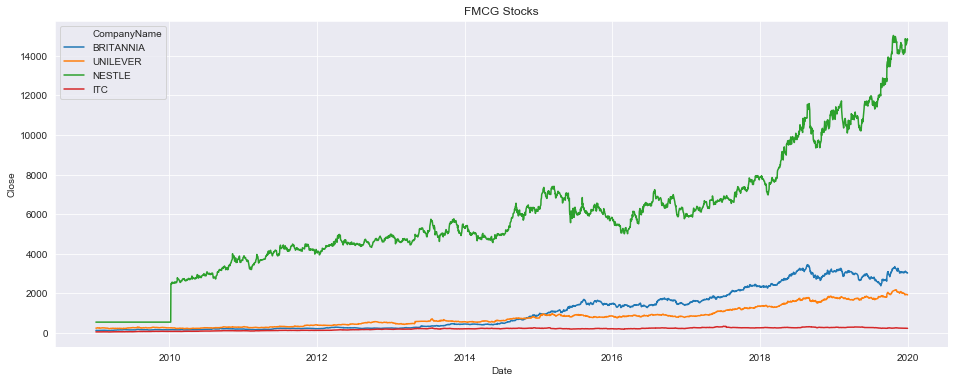

In [8]:
# this is for seaborn plots. 

import matplotlib.pyplot as plt
sns.set_style("darkgrid")
plt.figure(figsize=(16, 6))
bankplot=sns.lineplot(x='Date',y='Close',hue='CompanyName', data=df1 )
bankplot.set_title('FMCG Stocks')
bankplot


In [9]:
#this is for plotly plots

df1.iplot(kind='line',x='Date',y='Close',categories='CompanyName',mode='lines')

In [10]:
yearlist=[2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
datelist=list(df1[df1['Date']=='2009-01-02']['Date'].unique())
returns=pd.DataFrame()
#returns=pd.
for i in yearlist:
    datelist.append(df1[df1['Date'].apply(lambda x:x.year)==i]['Date'].max())
    
for j in datelist:
    returns =pd.concat([returns,df1[df1['Date']==j][['CompanyName','Date','Adj Close']]])
returns.reset_index(inplace=True,drop=True)
returns.rename(columns={'Adj Close':'Price'},inplace=True)
companylist=returns['CompanyName'].unique()
returns_pct_change=pd.DataFrame()
returns.set_index(['CompanyName','Date'],inplace=True)
return_pct_change=pd.DataFrame()
for k in  companylist:
    return_pct_change = pd.concat([return_pct_change,returns.loc[k].pct_change()],axis=1)
    return_pct_change.rename(columns={'Price':k},inplace=True)
    
return_pct_change.to_excel('FMCG_Returns.xlsx','FMCG')


    



In [11]:
yearlist=[2019]
datelist=list(df1[df1['Date']=='2009-01-02']['Date'].unique())
returns=pd.DataFrame()
#returns=pd.
for i in yearlist:
    datelist.append(df1[df1['Date'].apply(lambda x:x.year)==i]['Date'].max())
    
for j in datelist:
    returns =pd.concat([returns,df1[df1['Date']==j][['CompanyName','Date','Adj Close']]])
returns.reset_index(inplace=True,drop=True)
returns.rename(columns={'Adj Close':'Price'},inplace=True)
companylist=returns['CompanyName'].unique()
returns_pct_change=pd.DataFrame()
returns.set_index(['CompanyName','Date'],inplace=True)
return_pct_change_absolute=pd.DataFrame()
for k in  companylist:
    return_pct_change_absolute = pd.concat([return_pct_change_absolute,returns.loc[k].pct_change()],axis=1)
    return_pct_change_absolute.rename(columns={'Price':k},inplace=True)
    

return_pct_change_absolute.to_excel('FMCG_Returns_absolute.xlsx','FMCG')


    

